In [0]:
# https://www.datacamp.com/courses/importing-data-in-python-part-1

In [0]:
!pip install sas7bdat

  Stored in directory: /root/.cache/pip/wheels/92/33/40/ad01f5af97aab6c434ed57f3bb5f19a4dfa5666fdd39588f44
Successfully built sas7bdat


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import pickle
from sas7bdat import SAS7BDAT
import h5py
import scipy.io
from sqlalchemy import create_engine

## 1. Introduction and flat files

#### Welcome to the course!

**Exploring working directory**

Python, which is running on DataCamp's servers, has a bunch of cool commands, including its magic commands. For example, starting a line with ! gives you complete system shell access. 

This means that the IPython magic command ! ls will display the contents of your current directory. 

In [0]:
! ls

sample_data


In [0]:
# Open a file: file
file = open('/content/moby_dick.txt')

In [0]:
# Print it
print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [0]:
# Check whether file is closed
print(file.closed)

False


In [0]:
# Close file
file.close()

# Check whether file is closed
print(file.closed)

True


**Importing text files line by line**

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the readline() method, which allows you to do this. When a file called file is open, you can print out the first line by executing file.readline(). If you execute the same command again, the second line will print, and so on.


In [0]:
# Read & print the first 3 lines
with open('/content/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



#### Importing flat files using NumPy

In this exercise, you're now going to load the MNIST digit recognition dataset using the numpy function loadtxt() and see just how easy it can be:




*   The first argument will be the filename.
*   The second will be the delimiter which, in this case, is a comma.



In [0]:
df = pd.read_csv('/content/mnist_kaggle_some_rows.csv', header=None)
df.shape # (100, 785)

(100, 785)

In [0]:
# Import package
import numpy as np

In [0]:
# Assign filename to variable: file
file = '/content/mnist_kaggle_some_rows.csv'

In [0]:
# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

In [0]:
# Print datatype of digits
print(type(digits))

<class 'numpy.ndarray'>


In [0]:
# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

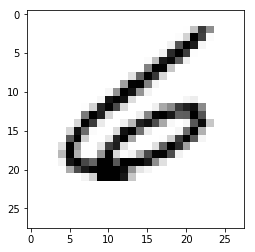

In [0]:
# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

**Customizing your NumPy import**

There are a number of arguments that np.loadtxt() takes that you'll find useful: delimiter changes the delimiter that loadtxt() is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; skiprows allows you to specify how many rows (not indices) you wish to skip; usecols takes a list of the indices of the columns you wish to keep.

The file that you'll be importing, digits_header.txt,



*   has a header
*   is tab-delimited.



In [0]:
# Assign the filename: file
file = '/content/digits_header.txt'



*   Complete the arguments of np.loadtxt(): the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.
*   Complete the argument of the print() call in order to print the entire array that you just imported.



In [0]:
# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0, 2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: loadtxt: Empty input file: "/content/digits_header.txt"
  """Entry point for launching an IPython kernel.


In [0]:
# Print data
print(data)

[]


**Importing different datatypes**

The file seaslug.txt


*   has a text header, consisting of strings
*   is tab-delimited.

Due to the header, if you tried to import it as-is using np.loadtxt(), Python would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows argument.



In [0]:
# Assign filename: file
file = '/content/seaslug.txt'

In [0]:
# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

In [0]:
# Print the first element of data
print(data[0])

['Time' 'Percent']


In [0]:
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

In [0]:
# Print the 10th element of data_float
print(data_float[9])

[0.    0.357]


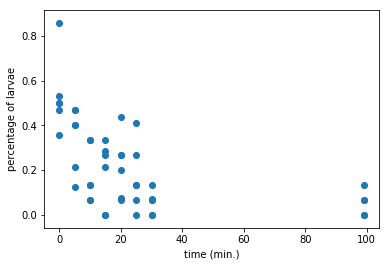

In [0]:
# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

**Working with mixed datatypes (1)**

Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. 

There is another function, np.genfromtxt(), which can handle such structures. I

In [0]:
data = np.genfromtxt('/content/titanic_sub.csv', delimiter=',', names=True, dtype=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [0]:
data

array([(  1, 0, 3, b'male', 22.  , 1, 0, b'A/5 21171',   7.25  , b'', b'S'),
       (  2, 1, 1, b'female', 38.  , 1, 0, b'PC 17599',  71.2833, b'C85', b'C'),
       (  3, 1, 3, b'female', 26.  , 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S'),
       (  4, 1, 1, b'female', 35.  , 1, 0, b'113803',  53.1   , b'C123', b'S'),
       (  5, 0, 3, b'male', 35.  , 0, 0, b'373450',   8.05  , b'', b'S'),
       (  6, 0, 3, b'male',   nan, 0, 0, b'330877',   8.4583, b'', b'Q'),
       (  7, 0, 1, b'male', 54.  , 0, 0, b'17463',  51.8625, b'E46', b'S'),
       (  8, 0, 3, b'male',  2.  , 3, 1, b'349909',  21.075 , b'', b'S'),
       (  9, 1, 3, b'female', 27.  , 0, 2, b'347742',  11.1333, b'', b'S'),
       ( 10, 1, 2, b'female', 14.  , 1, 0, b'237736',  30.0708, b'', b'C'),
       ( 11, 1, 3, b'female',  4.  , 1, 1, b'PP 9549',  16.7   , b'G6', b'S'),
       ( 12, 1, 1, b'female', 58.  , 0, 0, b'113783',  26.55  , b'C103', b'S'),
       ( 13, 0, 3, b'male', 20.  , 0, 0, b'A/5. 2151',   8.05  , b'

**Working with mixed datatypes (2)**

There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None.

In [0]:
# Assign the filename: file
file = '/content/titanic_sub.csv'

You'll only need to pass file to it because it has the defaults delimiter=',' and names=True in addition to dtype=None!

In [0]:
# Import file using np.recfromcsv: d
d = np.recfromcsv(file)

/usr/local/lib/python3.6/dist-packages/numpy/lib/npyio.py:2322: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [0]:
# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


#### Importing flat files using pandas

In [0]:
# Import pandas as pd
import pandas as pd

In [0]:
# Assign the filename: file
file = '/content/titanic_sub.csv'

In [0]:
# Read the file into a DataFrame: df
df = pd.read_csv(file)

In [0]:
# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500    NaN         S
1            2         1       1  ...  71.2833    C85         C
2            3         1       3  ...   7.9250    NaN         S
3            4         1       1  ...  53.1000   C123         S
4            5         0       3  ...   8.0500    NaN         S

[5 rows x 11 columns]


In the last exercise, you were able to import flat files into a pandas DataFrame. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the attribute values. 



In [0]:
# Assign the filename: file
file = '/content/mnist_kaggle_some_rows.csv'

In [0]:
# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

In [0]:
# Build a numpy array from the DataFrame: data_array
data_array = data.values

In [0]:
# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


**Customizing your pandas import**

Note that missing values are also commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which






*   contains comments after the character '#'
*   is tab-delimited.



In [0]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [0]:
# file not available
file = 'titanic_corrupt.txt'

In [0]:
# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

In [0]:
# Print the head of the DataFrame
print(data.head())

In [0]:
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

## 2. Importing data from other file types

#### Introduction to other file types

**Not so flat any more**

In [0]:
import os
wd = os.getcwd()
os.listdir(wd)

['.config',
 'moby_dick.txt',
 'titanic_sub.csv',
 'mnist_kaggle_some_rows.csv',
 'seaslug.txt',
 'digits_header.txt',
 'sample_data']

**Loading a pickled file**

JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [0]:
# Import pickle package
import pickle



*   Complete the second argument of open() so that it is read only for a binary file. This argument will be a string of two letters, one signifying 'read only', the other 'binary'.



In [0]:
# file not available
# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

In [0]:
# Print d
print(d)

In [0]:
# Print datatype of d
print(type(d))

**Listing sheets in Excel files**

Recall from the video that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.

In [0]:
# Assign spreadsheet filename: file
file = '/content/battledeath.xlsx'

In [0]:
# Load spreadsheet: xl
xl = pd.ExcelFile(file)

In [0]:
# Print sheet names
print(xl.sheet_names)

['2002', '2004']


**Importing sheets from Excel files**



In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.



In [0]:
# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931


In [0]:
# Load a sheet into a DataFrame by index: df2
df2 = xl.parse('2002')

# Print the head of the DataFrame df2
print(df2.head())

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


**Customizing your spreadsheet import**

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and parse_cols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.



*   Parse the first sheet by index. In doing so, skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to skiprows and names all need to be of type list.
*   Parse the second sheet by index. In doing so, parse only the first column with the parse_cols parameter, skip the first row and rename the column 'Country'. The argument passed to parse_cols also needs to be of type list.



In [0]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=1, names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


In [0]:
# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[0], skiprows=1, names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

ValueError: ignored

#### Importing SAS/Stata files using pandas

In [0]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

In [0]:
# Save file to a DataFrame: df_sas
with SAS7BDAT('/content/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

In [0]:
# Print head of DataFrame
print(df_sas.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


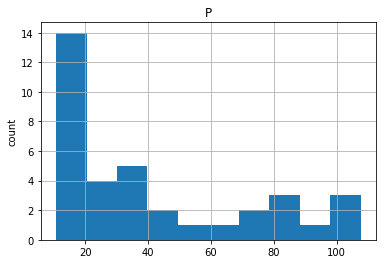

In [0]:
# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

**Importing Stata files**

In [0]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('/content/disarea.dta')

In [0]:
# Print the head of the DataFrame df
print(df.head())

  wbcode               country  disa1  disa2  ...  disa22  disa23  disa24  disa25
0    AFG           Afghanistan   0.00   0.00  ...    0.00    0.02    0.00    0.00
1    AGO                Angola   0.32   0.02  ...    0.99    0.98    0.61    0.00
2    ALB               Albania   0.00   0.00  ...    0.00    0.00    0.00    0.16
3    ARE  United Arab Emirates   0.00   0.00  ...    0.00    0.00    0.00    0.00
4    ARG             Argentina   0.00   0.24  ...    0.00    0.01    0.00    0.11

[5 rows x 27 columns]


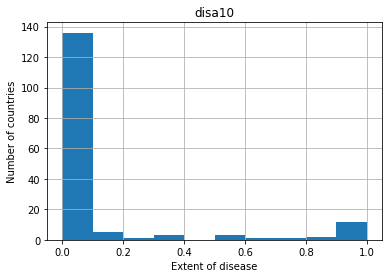

In [0]:
# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

#### Importing HDF5 files

In [0]:
# Import packages
import numpy as np
import h5py

In [0]:
# Assign filename: file
file = '/content/L-L1_LOSC_4_V1-1126259446-32.hdf5'

In [0]:
# Load file: data
data = h5py.File(file, 'r') # read only

In [0]:
# Print the datatype of the loaded file
print(type(data))

<class 'h5py._hl.files.File'>




*   Print the names of the groups in the HDF5 file 'LIGO_data.hdf5'.



In [0]:
# Print the keys of the file
for key in data.keys():
    print(key)

meta
quality
strain


**Extracting data from your HDF5 file**

In [0]:
# Get the HDF5 group: group
group = data['strain']

In [0]:
# Check out keys of group
for key in group.keys():
    print(key)

Strain


In [0]:
# Set variable equal to time series data: strain
strain = data['strain']['Strain'].value

In [0]:
# Set number of time points to sample: num_samples
num_samples = 10000

In [0]:
# Set time vector
time = np.arange(0, 1, 1/num_samples)

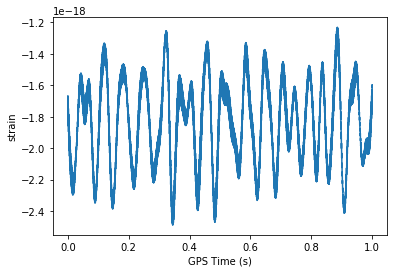

In [0]:
# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

#### Importing MATLAB files

In [0]:
# Import package
import scipy.io

In [0]:
# Load MATLAB file: mat
mat = scipy.io.loadmat('/content/ja_data2.mat')

In [0]:
# Print the datatype type of mat
print(type(mat))

<class 'dict'>


**The structure of .mat in Python**



*   Use the method .keys() on the dictionary mat to print the keys. Most of these keys (in fact the ones that do NOT begin and end with '_ _' ) are variables from the corresponding MATLAB environment.

*   Print the type of the value corresponding to the key 'CYratioCyt' in mat. Recall that mat['CYratioCyt'] accesses the value.
*   Print the shape of the value corresponding to the key 'CYratioCyt' using the numpy function shape().



In [0]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [0]:
# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

<class 'numpy.ndarray'>


In [0]:
# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

(200, 137)


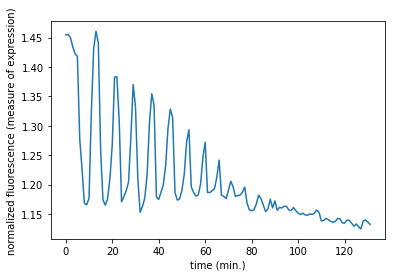

In [0]:
# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

## 3. Working with relational databases in Python

#### Introduction to relational databases



*   Each row or record in a table represents an instance of an entity type.

*   Each column in a table represents an attribute or feature of an instance.
*   Every table contains a primary key column, which has a unique entry for each row.
press



*   There are relations between tables.



#### Creating a database engine in Python

In [0]:
# Import necessary module
from sqlalchemy import create_engine

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

In [0]:
# Save the table names to a list: table_names
table_names = engine.table_names()

In [0]:
# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


#### Querying relational databases in Python

**The Hello World of SQL Queries!**

Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, SELECT, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query SELECT * selects all columns.

In [0]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

In [0]:
# Open engine connection: con
con = engine.connect()



*   Execute the query that selects ALL columns from the Album table. Store the results in rs.
*   Store all of your query results in the DataFrame df by applying the fetchall() method to the results rs.



In [0]:
# Perform query: rs
rs = con.execute("SELECT * FROM Album")

In [0]:
# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

In [0]:
# Close connection
con.close()

In [0]:
# Print head of DataFrame df
print(df.head())

   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


**Customizing the Hello World of SQL Queries**

Now you're going to figure out how to customize your query in order to:







*   Select specified columns from a table;

*   Select a specified number of rows;
*   Import column names from the database table.



In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')



*   Execute the SQL query that selects the columns LastName and Title from the Employee table. Store the results in the variable rs.


*   Apply the method fetchmany() to rs in order to retrieve 3 of the records. Store them in the DataFrame df.





In [0]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

In [0]:
# Print the length of the DataFrame df
print(len(df))

3


In [0]:
# Print the head of the DataFrame df
print(df.head())

  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


**Filtering your database records using SQL's WHERE**

In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')



*   Execute the query that selects all records from the Employee table where 'EmployeeId' is greater than or equal to 6. Use the >= operator and assign the results to rs.



In [0]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee WHERE EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

In [0]:
# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName  ...                Fax                    Email
0           6  Mitchell  ...  +1 (403) 246-9899  michael@chinookcorp.com
1           7      King  ...  +1 (403) 456-8485   robert@chinookcorp.com
2           8  Callahan  ...  +1 (403) 467-8772    laura@chinookcorp.com

[3 rows x 15 columns]


**Ordering your SQL records with ORDER BY**

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')



*   In the context manager, execute the query that selects all records from the Employee table and orders them in increasing order by the column BirthDate. Assign the result to rs.
*   In a call to pd.DataFrame(), apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.



In [0]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

In [0]:
# Print head of DataFrame
print(df.head())

   EmployeeId  LastName  ...                Fax                     Email
0           4      Park  ...  +1 (403) 263-4289  margaret@chinookcorp.com
1           2   Edwards  ...  +1 (403) 262-3322     nancy@chinookcorp.com
2           1     Adams  ...  +1 (780) 428-3457    andrew@chinookcorp.com
3           5   Johnson  ...   1 (780) 836-9543     steve@chinookcorp.com
4           8  Callahan  ...  +1 (403) 467-8772     laura@chinookcorp.com

[5 rows x 15 columns]


#### Querying relational databases directly with pandas

**Pandas and The Hello World of SQL Queries!**



*   Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from the table Album.



In [0]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

In [0]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * FROM Album", engine)

In [0]:
# Print head of DataFrame
print(df.head())

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


In [0]:
# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

In [0]:
# Confirm that both methods yield the same result
print(df.equals(df1))

True


**Pandas for more complex querying**

Here, you'll become more familiar with the pandas function read_sql_query() by using it to execute a more complex query: a SELECT statement followed by both a WHERE clause AND an ORDER BY clause.

In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')



*   Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from the Employee table where the EmployeeId is greater than or equal to 6 and ordered by BirthDate



In [0]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate",
    engine
)

In [0]:
# Print head of DataFrame
print(df.head())

   EmployeeId  LastName  ...                Fax                    Email
0           8  Callahan  ...  +1 (403) 467-8772    laura@chinookcorp.com
1           7      King  ...  +1 (403) 456-8485   robert@chinookcorp.com
2           6  Mitchell  ...  +1 (403) 246-9899  michael@chinookcorp.com

[3 rows x 15 columns]


#### Advanced Querying: exploiting table relationships

**INNER JOIN**



*   Assign to rs the results from the following query: select all the records, extracting the Title of the record and Name of the artist of each record from the Album table and the Artist table, respectively. To do so, INNER JOIN these two tables on the ArtistID column of both.
*   In a call to pd.DataFrame(), apply the method fetchall() to rs in order to fetch all records in rs. Store them in the DataFrame df.



In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

In [0]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

In [0]:
# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


**Filtering your INNER JOIN**

Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: 

select all records from

*  PlaylistTrack INNER JOIN Track on 
*   PlaylistTrack.TrackId = Track.TrackId

that satisfy the condition Milliseconds < 250000.



In [0]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

In [0]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM PlaylistTrack INNER JOIN Track ON PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000",
    engine
)

In [0]:
# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId  ... Milliseconds    Bytes  UnitPrice
0           1     3390     3390  ...       217732  3559040       0.99
1           1     3392     3392  ...       230758  3766605       0.99
2           1     3393     3393  ...       218916  3577821       0.99
3           1     3394     3394  ...       228366  3728955       0.99
4           1     3395     3395  ...       213831  3497176       0.99

[5 rows x 11 columns]
